In [ ]:
import csv
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import networkx as nx
import gensim
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('words')
from nltk.corpus import words
!pip install pyvis
from pyvis.network import Network

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
#Loads the data from csv file at the end of the first assignment


with open("/content/drive/MyDrive/Colab Data/words.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = csv.reader(read_obj)
    # Pass reader object to list() to get a list of lists
    words_data = list(csv_reader)

#from nltk.corpus import stopwords

for i in range(len(words_data)):
    words_data[i] = [w for w in words_data[i] if w not in stopwords.words('english')]


"\nfor i in range(len(words_data)):\n    words_data[i] = [w for w in words_data[i] if w not in stopwords.words('english')]\n"

In [ ]:
with open("/content/drive/MyDrive/Colab Data/cleaned_words.csv", 'w') as f:
    wr = csv.writer(f)
    wr.writerows(words_data)

In [ ]:
words_data[:10]

[['respiratory', 'viruses', 'common', 'causes', 'human', 'disease'],
 ['molecular',
  'detection',
  'techniques',
  'allowed',
  'previously',
  'known',
  'viruses',
  'reliably',
  'identified',
  'new',
  'viruses',
  'discovered'],
 ['molecular',
  'techniques',
  'real-time',
  'rt-pcr',
  'performed',
  'individual',
  'virus',
  'combined',
  'multiplex',
  'rt-rtpcr',
  'assay'],
 ['molecular',
  'methods',
  'target',
  'single',
  'analyte',
  'multiple',
  'viruses',
  'use',
  'variety',
  'nucleic',
  'acid',
  'detection',
  'based',
  'strategies',
  'including',
  'microarrays',
  '',
  'mass',
  'spectrometry',
  '',
  'spectrally',
  'distinct',
  'bead',
  'microarrays',
  '',
  'capillary',
  'electrophoresis',
  '',
  'microsphere',
  'flow',
  'cytometry'],
 ['performance',
  'molecular',
  'diagnostic',
  'methods',
  'either',
  'rt-rtpcr',
  'multiplex',
  'assays',
  'typically',
  'evaluated',
  'comparing',
  'conventional',
  'direct',
  'fluorescent',
  '

In [ ]:
def compute_word_vectors(text_data): 
    model = word2vec.Word2Vec(text_data, size=128, window=5, min_count=50, workers=10, iter=10)
    return model

def compute_similar_words(model,source_word, topn=5):
    print('\r Computing similar words for the source word - {0}'.format(source_word),end='')
    similar_words = [source_word]
    try:
        top_words = model.wv.most_similar(source_word,topn=topn)
        similar_words.extend([val[0] for val in top_words])
    except KeyError as err:
        print(err.args)
    return similar_words   

def compute_similar_words_for_assignment3(model, keywords): #model - Word2vec model stored earlier 
    columns = ['word'+str(i-1) for i in range(1,7)]
    df = pd.DataFrame(data=None,columns=columns)

    #Keywords contains the list of keywords from the vocabulary. 
    #These keywords are used to find similar words 

    for source_word in keywords:
        similar_words = compute_similar_words(model,source_word)
        df.loc[len(df)] = similar_words
        
        for i in range(1,len(similar_words)):
            sec_similar_words = compute_similar_words(model,similar_words[i])
            df.loc[len(df)] = sec_similar_words
    return df

In [ ]:
model = gensim.models.Word2Vec(words_data, size=128, window=5, min_count=50, workers=10, iter=10)

In [ ]:
df = compute_similar_words_for_assignment3(model, ['respiratory', 'virus', 'molecular', 'complex'])
df

 Computing similar words for the source word - physiological

,word0,word1,word2,word3,word4,word5
0,respiratory,gastrointestinal,acute,breath,tract,diarrhea
1,gastrointestinal,tract,diarrhea,distress,cough,illnesses
2,acute,syndrome,distress,diarrhea,neurological,cough
3,breath,cough,diarrhea,distress,fever,throat
4,tract,gastrointestinal,upper,distress,intestinal,fungal
5,diarrhea,cough,fever,syndrome,fatal,illnesses
6,virus,viruses,pathogen,iav,avian,rhinovirus
7,viruses,virus,iav,coronaviruses,pathogen,bats
8,pathogen,pathogens,hosts,iav,humans,pathogenic
9,iav,bats,pathogen,rodent,avian,h5n1


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#words = pd.read_csv('../COVID19/results/similar_words_task1.csv')
words = df
g = nx.cubical_graph()

#Construct the graph
#for every source word(node), add edges - connected through similarity
#As there two levels of similar words, we need to repeat the same to construct the graph
for i, row in words.iterrows():
    for j in range(1,len(row)):
        g.add_node(row[j])
    for j in range(1,len(row)):
        g.add_edge(row[1], row[j])    
      
G = nx.petersen_graph()
#plt.subplot()
options = {
    'node_color': 'blue',
    'node_size': 8,
    'linewidths': 0.3,
    'width': 0.5,
    'font_size':6,
}

#make sure to filter nodes based on the degree of connectivity
#and pick up nodes that are well connected. The number of connected concepts can be tuned using 
#the filter given below

fedges = filter(lambda x: g.degree()[x[0]] > 1 and g.degree()[x[1]] > 2, g.edges())
f = nx.Graph()                                                                                                                                     
f.add_edges_from(fedges)

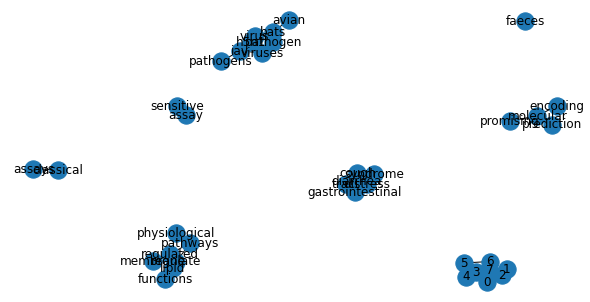

In [ ]:
nx.draw(f, with_labels=True)

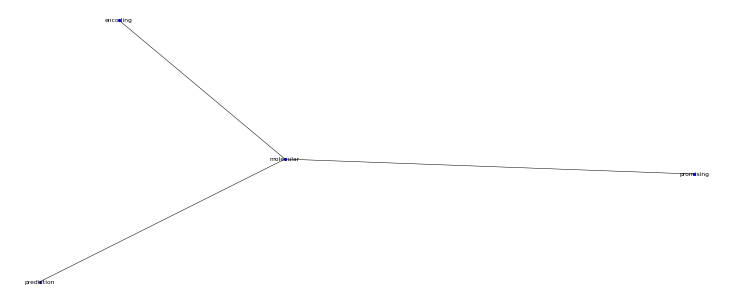

In [ ]:
#This is to show how well the keyword is connected with the other words in the corpus  
#change the keyword to obtain a different graph
#you do not need this while running the entire no
plt.rcParams['figure.figsize'] = [10, 4]

subgraph = nx.node_connected_component(f,'encoding')
print()
nx.draw(g.subgraph(subgraph), with_labels=True, **options)
plt.savefig("similarity_nodes.pdf")
plt.show()